# Clustering

Datasets for this practical can be found here: [Link](https://github.com/wadieskaf/ELTE_ITDS_Labs/tree/master/Datasets)

## 1. Loading and visualizing the data

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

We can generate random data

In [40]:
x, y = make_blobs(n_samples=300, n_features=2, centers=4, shuffle=True, random_state=42)
# put into a dataframe
df_simple_data = pd.DataFrame(x, columns=['x1', 'x2'])
df_simple_data['y'] = y

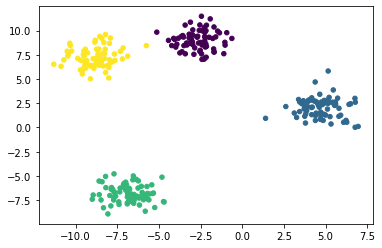

In [41]:
plt.scatter(df_simple_data['x1'], df_simple_data['x2'], c=df_simple_data['y'], s=20)

We can read data from a csv file (Pandas will be explained in the next session)

In [42]:
df_concave_data = pd.read_csv('datasets/concave_dataset.txt', delimiter='\t', header=0, names=['x', 'y', 'class'])

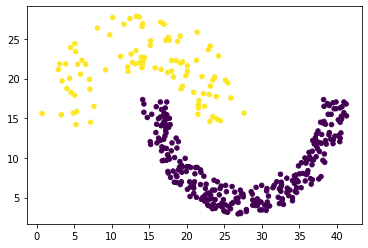

In [43]:
plt.scatter(df_concave_data['x'], df_concave_data['y'], c=df_concave_data['class'], s=20)

# 2. Clustering Algorithms

## 2.1 K-Means

In [44]:
from sklearn.cluster import KMeans

### 2.1.1 K-Means with simple data

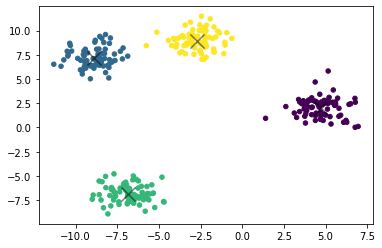

In [45]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_simple_data[['x1', 'x2']])
y_kmeans = kmeans.predict(df_simple_data[['x1', 'x2']])
plt.scatter(df_simple_data['x1'], df_simple_data['x2'], c=y_kmeans, s=20, cmap='viridis')
# plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='x');

# 2.1.2 K-Means with concave data

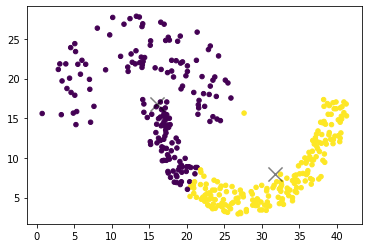

In [46]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_concave_data[['x', 'y']])
y_kmeans = kmeans.predict(df_concave_data[['x', 'y']])
plt.scatter(df_concave_data['x'], df_concave_data['y'], c=y_kmeans, s=20, cmap='viridis')
# plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, marker='x');

### 2.1.3 How to choose the number of clusters? (Elbow method)

Text(0.5, 1.0, 'Elbow method')

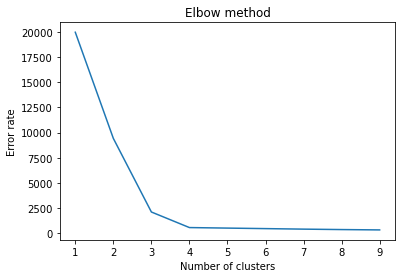

In [47]:
error_rate = []
ns = range(1, 10)
for n in ns:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_simple_data[['x1', 'x2']])
    error_rate.append(kmeans.inertia_)
plt.plot(ns, error_rate)
plt.xlabel('Number of clusters')
plt.ylabel('Error rate')
plt.title('Elbow method')


## 2.2 DBSCAN

In [48]:
from sklearn.cluster import DBSCAN

### 2.2.1 DBSCAN with simple data

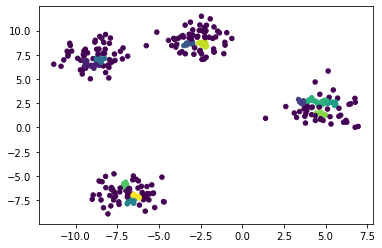

In [49]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(df_simple_data[['x1', 'x2']])
y_dbscan = dbscan.fit_predict(df_simple_data[['x1', 'x2']])
plt.scatter(df_simple_data['x1'], df_simple_data['x2'], c=y_dbscan, s=20, cmap='viridis')

### 2.2.2 DBSCAN with concave data

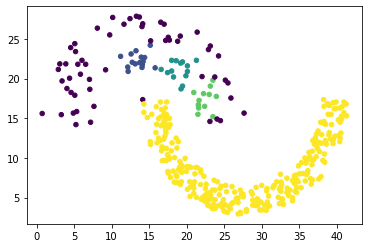

In [53]:
dbscan = DBSCAN(eps=2.0, min_samples=8)
dbscan.fit(df_concave_data[['x', 'y']])
y_dbscan = dbscan.fit_predict(df_concave_data[['x', 'y']])
plt.scatter(df_concave_data['x'], df_concave_data['y'], c=y_dbscan, s=20, cmap='viridis')

## 2.3 Agglomerative Clustering

In [54]:
from sklearn.cluster import AgglomerativeClustering

### 2.3.1 Agglomerative Clustering with simple data

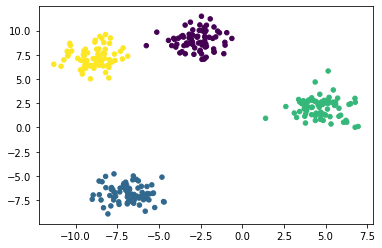

In [56]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(df_simple_data[['x1', 'x2']])
y_agg = agg.fit_predict(df_simple_data[['x1', 'x2']])
plt.scatter(df_simple_data['x1'], df_simple_data['x2'], c=y_agg, s=20, cmap='viridis')

### 2.3.2 Agglomerative Clustering with concave data

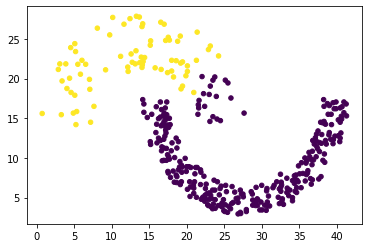

In [57]:
agg = AgglomerativeClustering(n_clusters=2, linkage='complete')
agg.fit(df_concave_data[['x', 'y']])
y_agg = agg.fit_predict(df_concave_data[['x', 'y']])
plt.scatter(df_concave_data['x'], df_concave_data['y'], c=y_agg, s=20, cmap='viridis')

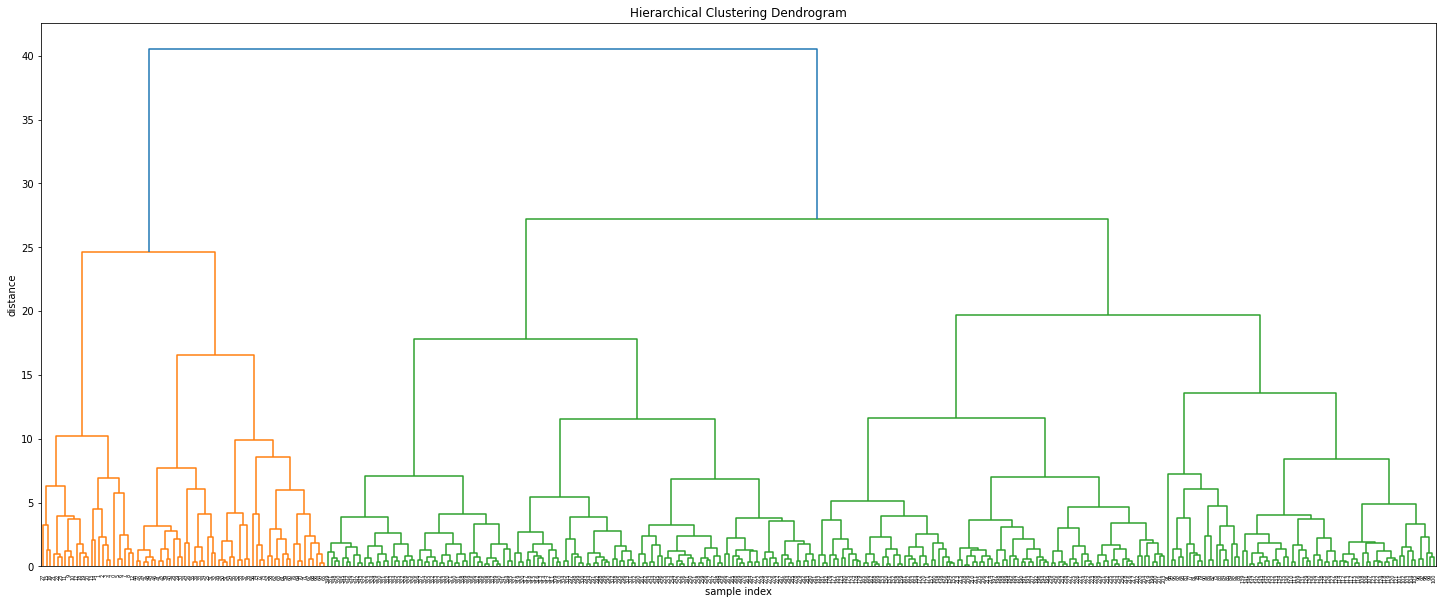

In [58]:
# plot dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_concave_data[['x', 'y']], 'complete')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90.)
plt.show()

# 3. Evaluation

In [59]:
from sklearn.metrics import silhouette_score

In [60]:
print('K-Means: ', silhouette_score(df_concave_data[['x', 'y']], y_kmeans))

K-Means:  0.4953565495001046


In [61]:
print('DBSCAN: ', silhouette_score(df_concave_data[['x', 'y']], y_dbscan))

DBSCAN:  0.08732717399597713


In [62]:
print('Agglomerative Clustering: ', silhouette_score(df_concave_data[['x', 'y']], y_agg))

Agglomerative Clustering:  0.43086635093636244


# More Algorithms can be found here: https://scikit-learn.org/stable/modules/clustering.html

# 4. Exercises

## 4.1.
## A. Load the drivers dataset 'datasets/drivers_dataset.csv'
## B. Visualize the data
## C. Apply K-Means with choosing the number of clusters using the elbow method.
## D. Apply DBSCAN and Agglomerative Clustering with the same number of clusters as in A.
## E. Compare the results of A, B and C using the silhouette score.
## 4.2.
## A. Optimize the parameters of DBSCAN for the concave dataset using the silhouette score and plot the results
## B. Go to the [Clustering Gallery](https://scikit-learn.org/stable/modules/clustering.html) and try to find a clustering algorithm that can perform better than DBSCAN on this dataset